In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [24]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255 

In [11]:
np.shape(x_train)

(18000, 32, 32, 3)

In [25]:
x_train, x_unlab, y_train, y_unlab = train_test_split( train_images, train_labels , test_size=0.6, random_state=42 )

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split( x_train,y_train , test_size=0.5, random_state=40 )

In [10]:
len(X_train)

10000

In [11]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [19]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(2, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(4, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(4, (3, 3),))
    model.add(layers.Conv2D(8, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(8, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(32))
    model.add(layers.Dense(10, activation="softmax"))

    model.summary()
    return model

In [13]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = tf.keras.applications.MobileNetV3Small(
    input_shape=(32,32,3),
    alpha=1.0,
    minimalistic=True,
    include_top=True,
    weights=None,
    input_tensor=None,
    classes=10,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

    model.summary()
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 2)         56        
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 4)         76        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 4)         148       
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 8)         296       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                 

125/125 [==============================] - 3s 25ms/step - loss: 1.6093 - accuracy: 0.4115 - val_loss: 1.6766 - val_accuracy: 0.3835
Epoch 21/50
123/125 [============================>.] - ETA: 0s - loss: 1.5973 - accuracy: 0.4170
Epoch 21: val_loss did not improve from 1.67663
125/125 [==============================] - 3s 25ms/step - loss: 1.5982 - accuracy: 0.4166 - val_loss: 1.6806 - val_accuracy: 0.3795
Epoch 22/50
123/125 [============================>.] - ETA: 0s - loss: 1.5899 - accuracy: 0.4221
Epoch 22: val_loss did not improve from 1.67663
125/125 [==============================] - 3s 24ms/step - loss: 1.5905 - accuracy: 0.4221 - val_loss: 1.6795 - val_accuracy: 0.3875
Epoch 23/50
125/125 [==============================] - ETA: 0s - loss: 1.5856 - accuracy: 0.4194
Epoch 23: val_loss improved from 1.67663 to 1.66124, saving model to FullModelCheckpoint.h5
125/125 [==============================] - 3s 26ms/step - loss: 1.5856 - accuracy: 0.4194 - val_loss: 1.6612 - val_accuracy: 

124/125 [============================>.] - ETA: 0s - loss: 1.4875 - accuracy: 0.4582
Epoch 48: val_loss did not improve from 1.60028
125/125 [==============================] - 3s 25ms/step - loss: 1.4872 - accuracy: 0.4584 - val_loss: 1.6124 - val_accuracy: 0.4150
Epoch 49/50
124/125 [============================>.] - ETA: 0s - loss: 1.4743 - accuracy: 0.4643
Epoch 49: val_loss improved from 1.60028 to 1.59526, saving model to FullModelCheckpoint.h5
125/125 [==============================] - 3s 26ms/step - loss: 1.4742 - accuracy: 0.4642 - val_loss: 1.5953 - val_accuracy: 0.4220
Epoch 50/50
125/125 [==============================] - ETA: 0s - loss: 1.4716 - accuracy: 0.4652
Epoch 50: val_loss did not improve from 1.59526
125/125 [==============================] - 3s 24ms/step - loss: 1.4716 - accuracy: 0.4652 - val_loss: 1.6166 - val_accuracy: 0.4250


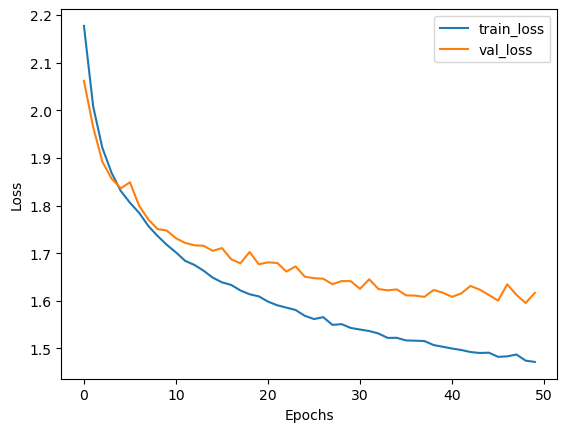

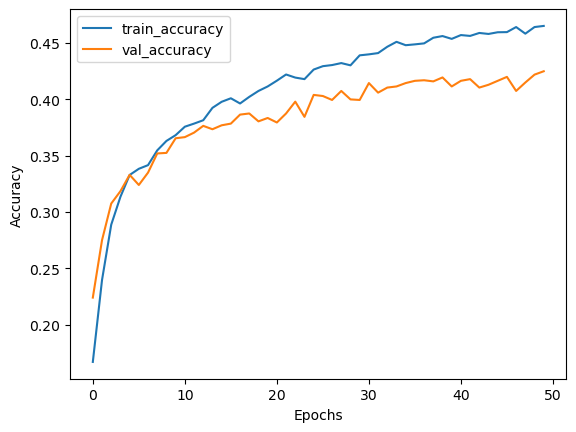

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.620974063873291, 'accuracy': 0.41760000586509705}
----------------------------------------------------------------------------------------------------


In [27]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=50,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ), ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_train, X_test, Y_train, Y_test)

In [28]:
def train(model,X_train, Y_train):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    checkpoint = keras.callbacks.ModelCheckpoint(
        "AL_Model.h5", save_best_only=True, verbose=1
    )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=8, verbose=1)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(X_train, Y_train, batch_size = 64, epochs=50,validation_split=.20,
                        callbacks=[checkpoint],
    )
    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )

    return model

In [29]:
def test(model, X_test, Y_test):
    print("-" * 100)
    print("Test set evaluation: ", model.evaluate( X_test, Y_test , verbose=0, return_dict=True), )
    print("-" * 100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 2)         56        
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 4)         76        
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 4)         148       
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 8)         296       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                 

125/125 [==============================] - ETA: 0s - loss: 1.6505 - accuracy: 0.4020
Epoch 21: val_loss improved from 1.73761 to 1.73536, saving model to AL_Model.h5
125/125 [==============================] - 3s 27ms/step - loss: 1.6505 - accuracy: 0.4020 - val_loss: 1.7354 - val_accuracy: 0.3800
Epoch 22/50
125/125 [==============================] - ETA: 0s - loss: 1.6398 - accuracy: 0.4079
Epoch 22: val_loss improved from 1.73536 to 1.73421, saving model to AL_Model.h5
125/125 [==============================] - 3s 27ms/step - loss: 1.6398 - accuracy: 0.4079 - val_loss: 1.7342 - val_accuracy: 0.3790
Epoch 23/50
125/125 [==============================] - ETA: 0s - loss: 1.6306 - accuracy: 0.4079
Epoch 23: val_loss improved from 1.73421 to 1.70901, saving model to AL_Model.h5
125/125 [==============================] - 3s 26ms/step - loss: 1.6306 - accuracy: 0.4079 - val_loss: 1.7090 - val_accuracy: 0.3850
Epoch 24/50
123/125 [============================>.] - ETA: 0s - loss: 1.6212 - ac

Epoch 49/50
125/125 [==============================] - ETA: 0s - loss: 1.4903 - accuracy: 0.4620
Epoch 49: val_loss improved from 1.63277 to 1.62962, saving model to AL_Model.h5
125/125 [==============================] - 3s 25ms/step - loss: 1.4903 - accuracy: 0.4620 - val_loss: 1.6296 - val_accuracy: 0.4210
Epoch 50/50
125/125 [==============================] - ETA: 0s - loss: 1.4875 - accuracy: 0.4638
Epoch 50: val_loss improved from 1.62962 to 1.62751, saving model to AL_Model.h5
125/125 [==============================] - 3s 27ms/step - loss: 1.4875 - accuracy: 0.4638 - val_loss: 1.6275 - val_accuracy: 0.4230


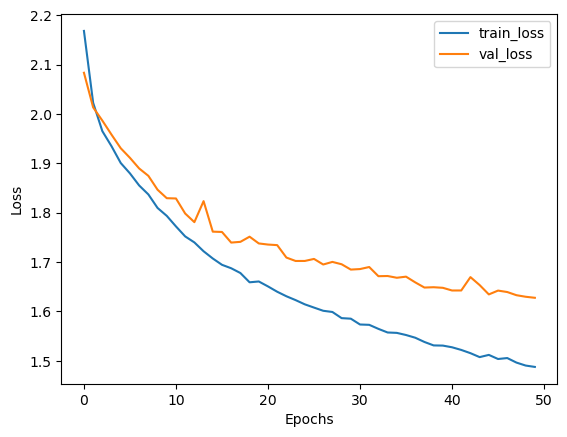

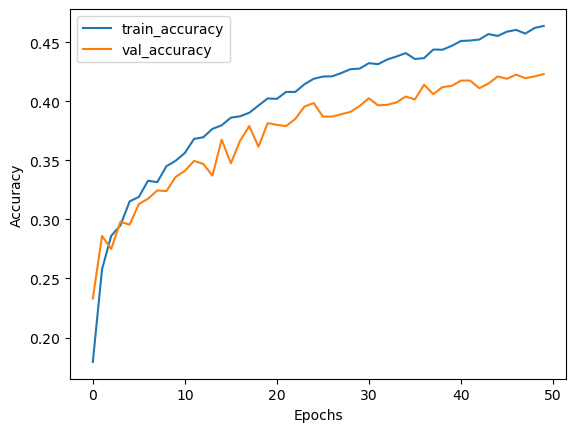




Iteration : 
0



47/47 [==============================] - 1s 9ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.6248316764831543, 'accuracy': 0.41620001196861267}
----------------------------------------------------------------------------------------------------
Starting to train with 11500 samples
Epoch 1/50
143/144 [============================>.] - ETA: 0s - loss: 1.3494 - accuracy: 0.4435
Epoch 1: val_loss improved from inf to 1.34215, saving model to AL_Model.h5
144/144 [==============================] - 7s 40ms/step - loss: 1.3496 - accuracy: 0.4439 - val_loss: 1.3421 - val_accuracy: 0.4330
Epoch 2/50
142/144 [============================>.] - ETA: 0s - loss: 1.3509 - accuracy: 0.4408
Epoch 2: val_loss did not improve from 1.34215
144/144 [==============================] - 4s 28ms/step - loss: 1.3494 - accuracy: 0.4410 - val_loss: 1.3885 - val_accuracy: 0.4078
Epoch 3/50
143/144 [====

Epoch 27/50
144/144 [==============================] - ETA: 0s - loss: 241302503424.0000 - accuracy: 0.1045
Epoch 27: val_loss did not improve from 1.34215
144/144 [==============================] - 4s 24ms/step - loss: 241302503424.0000 - accuracy: 0.1045 - val_loss: 182229794816.0000 - val_accuracy: 0.1030
Epoch 28/50
142/144 [============================>.] - ETA: 0s - loss: 303551578112.0000 - accuracy: 0.1074
Epoch 28: val_loss did not improve from 1.34215
144/144 [==============================] - 4s 25ms/step - loss: 302347583488.0000 - accuracy: 0.1075 - val_loss: 187135787008.0000 - val_accuracy: 0.1330
Epoch 29/50
142/144 [============================>.] - ETA: 0s - loss: 374141845504.0000 - accuracy: 0.1079
Epoch 29: val_loss did not improve from 1.34215
144/144 [==============================] - 4s 25ms/step - loss: 374968713216.0000 - accuracy: 0.1079 - val_loss: 313857900544.0000 - val_accuracy: 0.1861
Epoch 30/50
144/144 [==============================] - ETA: 0s - loss:

In [ ]:
from sklearn.metrics import confusion_matrix
import random

def train_active_learning_models(
    X_train,
    Y_train,
    x_unlab,
    y_unlab,
    X_test,
    Y_test,
    num_iterations=5
):

    # Creating lists for storing metrics
    losses, val_losses, accuracies, val_accuracies = [], [], [], []

    model = create_model()
    # We will monitor the false positives and false negatives predicted by our model
    # These will decide the subsequent sampling ratio for every Active Learning loop
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
    model = train(model,X_train, Y_train)
    
    l = len(y_unlab)
    x = int(np.round( l/20 ))
    
    for iteration in range(num_iterations-1):
        
        l = len(y_unlab)
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration)
        
        print("\n\n")
         
        #generate random number and substract from all numbers
        rnd = random.sample(range(1, l), x)
        all = list(range(1, l))
        main_list = list(set(all) - set(rnd))
        
        #add those index to from unlablled set to training set
        new_lab = x_unlab[rnd]
        arr = np.concatenate((X_train, new_lab))
        X_train = arr

        #predict on the set and add to training data
        new_y = np.round(model.predict(new_lab))
        arr = np.concatenate((Y_train, new_y))
        Y_train = arr
        
        
        #create the new unlabelled set
        x_unlab = x_unlab[main_list]

        #create the new unlabelled label set
        y_unlab = y_unlab[main_list]
        
        #test on data
        test(model, X_test, Y_test)
        
        #train on data
        model = train(model,X_train, Y_train)
        
    #Final round training set
    arr = np.concatenate((X_train, x_unlab))
    X_train = arr

    #Final round training label set
    new_y = np.round(model.predict(x_unlab))
    arr = np.concatenate((Y_train, new_y))
    Y_train = arr
    
    #train final
    model = train(model,X_train, Y_train)
    
    #test for final time
    test(model, X_test, Y_test)
        
    #return model
    return model

active_learning_model = train_active_learning_models(X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=5)